# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [275]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [276]:
# loading the data: Wholesale customers data
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
  
# metadata 
print(wholesale_customers.metadata) 
  
# variable information 
print(wholesale_customers.variables) 

{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [277]:
# Setting the Data Frame:
df = wholesale_customers.data.features.copy()
df['Region'] = wholesale_customers.data.targets.copy()

In [278]:
df.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,2,12669,9656,7561,214,2674,1338,3
1,2,7057,9810,9568,1762,3293,1776,3
2,2,6353,8808,7684,2405,3516,7844,3
3,1,13265,1196,4221,6404,507,1788,3
4,2,22615,5410,7198,3915,1777,5185,3


<AxesSubplot:>

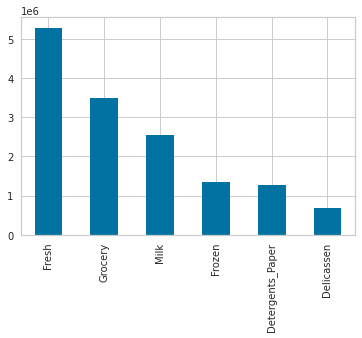

In [279]:
customer_totals = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)
customer_totals.sort_values(ascending=False, inplace=True)

# Totals
product_totals = df.drop(axis=1, columns=['Region', 'Channel']).sum()
product_totals.sort_values(ascending=False, inplace=True)
product_totals.plot(kind='bar')

Channel             int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
Region              int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   Region            440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


<AxesSubplot:>

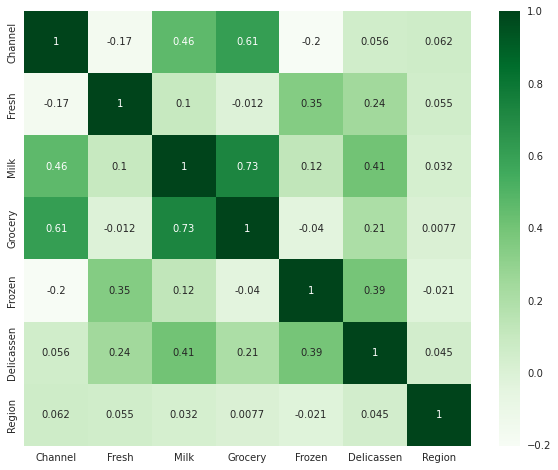

In [280]:
# Dtypes = int : no need to convert data
print(df.dtypes)

# No null values
print(df.info())

# Correlation matrix
corr_matrix = df.corr()

# Plotting correlation matrix dropping 'Detergents_Paper' from matrix due to having high correlation with other variables
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix.drop(columns='Detergents_Paper', index='Detergents_Paper'), annot=True, cmap='Greens')

<AxesSubplot:ylabel='Grocery'>

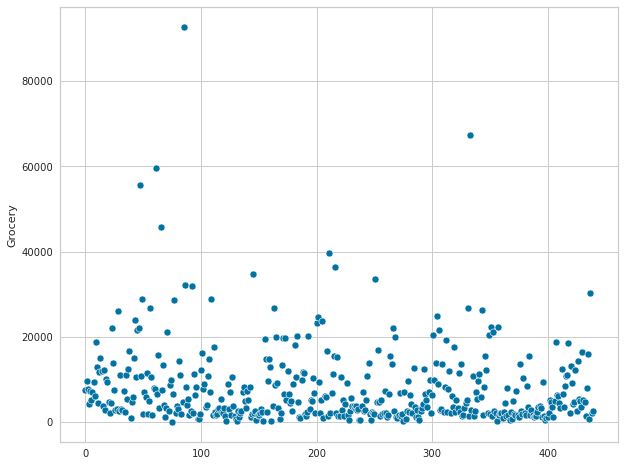

In [281]:
# Scatterplot data

plt.figure(figsize=(10,8))
sns.scatterplot(df['Grocery'])

<AxesSubplot:>

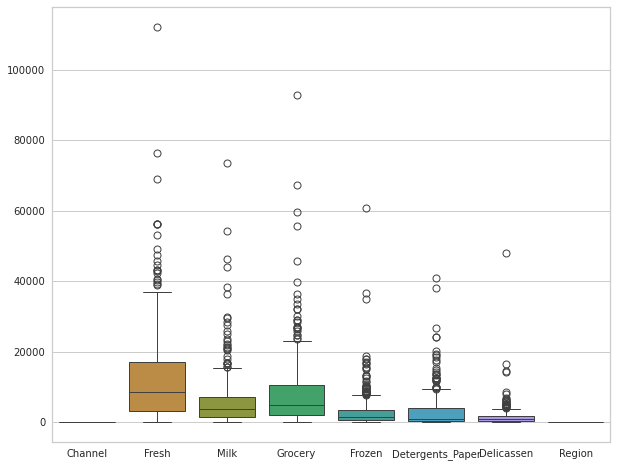

In [282]:
# Find outliers

plt.figure(figsize=(10,8))
sns.boxplot(df)

# Density Distribution

!['Boxplot'](https://www.researchgate.net/publication/340996565/figure/fig3/AS:962186885210119@1606414638167/Box-plot-and-probability-density-function-of-a-normal-distribution.png)

In [283]:
# Using IQR to detect and remove outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Interquartil Range
IQR = Q3 - Q1

# Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outliers
df_outliers = df[(df >= lower_bound) & (df <= upper_bound)]
df_without_outliers = df_outliers.dropna()

df_without_outliers

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,2,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,3
1,2,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,3
3,1,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,3
5,2,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,3
6,2,12126.0,3199.0,6975.0,480.0,3140.0,545.0,3
...,...,...,...,...,...,...,...,...
432,1,21117.0,1162.0,4754.0,269.0,1328.0,395.0,3
433,1,1982.0,3218.0,1493.0,1541.0,356.0,1449.0,3
434,1,16731.0,3922.0,7994.0,688.0,2371.0,838.0,3
438,1,10290.0,1981.0,2232.0,1038.0,168.0,2125.0,3


<AxesSubplot:ylabel='Delicassen'>

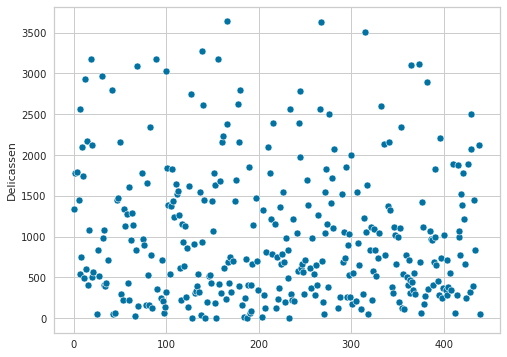

In [284]:
# Plot without outliers
plt.figure(figsize=(8,6))
sns.scatterplot(df_without_outliers['Delicassen'])

<AxesSubplot:ylabel='Delicassen'>

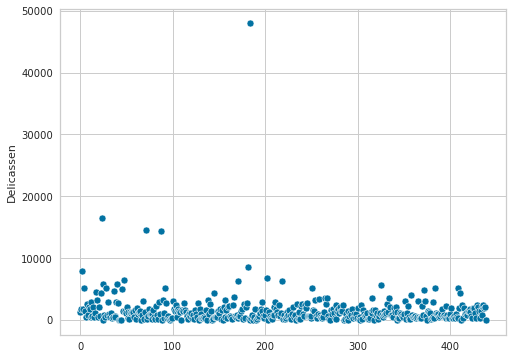

In [285]:
# Plot with outliers
plt.figure(figsize=(8,6))
sns.scatterplot(df['Delicassen'])

**Tus observaciones aquí**

+ Frozen, Grocery, Milk y Detergents Paper tienen una gran diferencia entre rangos de datos, por lo que se procede a estandarizar los mismos
+ Detergents Papers tiene alta correlación con 3 variables, por lo que se elimina al ser la variable que menor peso tiene 
+ Se eliminan los outliers de todas las variables, aunque estos constituyen en torno al 25% del Dataframe, por lo que habría que evaluar el impacto que estos outliers tienen ya que podrían añadir precisión al modelo


# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [286]:
# The data is already cleaned up: removing the 'Detergents_Paper' due to high correlation and the target column 'Region'
df_clean = df_without_outliers.drop(columns=['Detergents_Paper', 'Region']).copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 439
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Channel     332 non-null    int64  
 1   Fresh       332 non-null    float64
 2   Milk        332 non-null    float64
 3   Grocery     332 non-null    float64
 4   Frozen      332 non-null    float64
 5   Delicassen  332 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 18.2 KB


**Tus observaciones aquí**

+ Frozen, Grocery, Milk y Detergents Paper tienen una gran diferencia entre rangos de datos, por lo que se procede a estandarizar los mismos (reto 3)
+ Detergents Papers tiene alta correlación con 3 variables, por lo que se elimina al ser la variable que menor peso tiene 
+ Se eliminan los outliers de todas las variables, aunque estos constituyen en torno al 25% del Dataframe, por lo que habría que evaluar el impacto que estos outliers tienen ya que podrían añadir precisión al modelo

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [287]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
print(scaler.fit(df_clean))

customers_scale = scaler.transform(df_clean)
customers_scale

StandardScaler()


array([[ 1.5794736 ,  0.38304079,  1.65289825,  0.33497772, -0.96700429,
         0.3904653 ],
       [ 1.5794736 , -0.30558788,  1.69875568,  0.73387771, -0.05925481,
         0.92259064],
       [-0.63312233,  0.45617384, -0.86628288, -0.32886183,  2.66282084,
         0.93716941],
       ...,
       [-0.63312233,  0.88147444, -0.05454674,  0.42103835, -0.68904999,
        -0.21698372],
       [-0.63312233,  0.09112211, -0.63252908, -0.72418424, -0.48380948,
         1.34659005],
       [-0.63312233, -0.82954447, -0.71679956, -0.66893053, -1.05437811,
        -1.17189357]])

# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

[6 0 7 6 6 0 5 0 0 6 3 6 3 5 4 3 5 3 7 6 2 1 3 5 1 2 5 6 4 3 4 6 4 6 7 5 4
 2 5 4 1 5 6 6 4 7 5 6 7 5 0 2 7 5 5 5 4 0 2 6 3 2 4 5 6 5 5 7 0 0 6 1 1 0
 4 6 2 4 2 2 2 5 5 2 7 2 5 2 6 2 3 5 7 5 1 5 5 5 7 5 3 5 3 3 1 1 5 5 7 1 1
 5 2 5 5 0 2 0 4 0 2 2 6 0 0 5 5 5 4 5 5 0 3 5 7 3 5 5 5 7 7 6 0 7 1 5 4 5
 0 2 5 5 5 5 6 5 2 5 5 6 0 2 5 2 5 7 7 5 1 6 5 5 7 5 1 5 2 5 5 2 5 2 2 3 0
 0 5 2 1 7 5 7 3 2 5 7 5 7 1 7 4 0 3 4 2 7 5 5 2 5 5 3 7 6 5 0 5 1 5 5 7 4
 1 6 2 6 6 5 3 4 6 4 4 1 5 1 7 5 0 5 5 5 5 2 2 1 2 7 5 7 2 3 3 1 6 0 5 5 5
 4 6 5 5 5 4 7 5 2 4 5 2 5 5 5 5 0 5 5 1 5 3 5 5 0 5 6 2 3 7 2 5 2 5 2 7 5
 5 1 2 0 7 7 5 7 1 1 2 5 4 6 5 5 7 0 4 5 4 5 5 6 1 6 6 3 5 5 0 1 5 1 5 5]


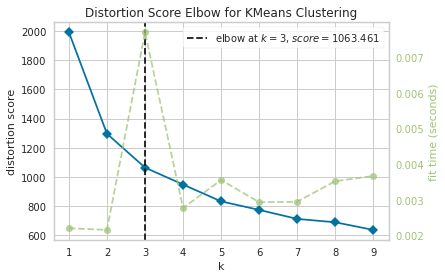

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [288]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Your code here:
kmeans = KMeans(random_state=42)
kmeans.fit(customers_scale)
print(kmeans.labels_)

visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(customers_scale)
visualizer.show()

### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

In [294]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [296]:
clean_customers['Label'] = clusters

NameError: name 'clean_customers' is not defined

Cuenta los valores en `labels`.

In [ ]:
# Your code here:


# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN 

# Your code here


Cuenta los valores en `labels_DBSCAN`.

In [ ]:
# Your code here


# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [ ]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

In [ ]:
# Your code here:


Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [ ]:
# Your code here:


Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [ ]:
# Your code here:


Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [ ]:
# Your code here:


¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

El rendimiento de los algoritmos...

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
